In [1]:
# HCASE_Plot_tSNE_MainText
#
# Author: Gergely Zahoranszky-Kohalmi, PhD
#
# Email: gergely.zahoranszky-kohalmi@nih.gov
#
# Organization: National Center for Advancing Translational Sciences (NCATS/NIH)
#

In [2]:
import pandas as pd

import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import morgantsne




In [3]:
# Config section



fname_drug_tSNE_embedding = '../data/drug_tSNE_embedding.tab'

fname_reduced_drug_tSNE_embedding = '../data/reduced_drug_tSNE_embedding.tab'

fname_knn = '../data/rnd_5_app_drugs_drugbank_knn_5.tab'

fname_out_drugs_knn_tsne_plot = '../plots/tsne/orig_tsne_main.png'




In [4]:
# Import datasets

df_emb = pd.read_csv (fname_drug_tSNE_embedding, sep = '\t')

df_red_emb = pd.read_csv(fname_reduced_drug_tSNE_embedding, sep ='\t')

df_knn = pd.read_csv(fname_knn, sep ='\t')




In [5]:
# Functions


# These functions are for plotting, not for main (tSNE embedding) logic

def separate_query_from_target_mols (df_knn):
    df_target = df_knn[['knn_target_id', 'knn_target_structure', 'knn_color', 'data_label']].copy()
    df_target['knn_type'] = 'nn'
    df_target = df_target.rename(columns = {
        'knn_target_id': 'id',
        'knn_target_structure': 'smiles'
    #    'knn_color': 'color'
    })
    
    df_query = df_knn[['knn_query_id', 'knn_query_structure', 'knn_color', 'data_label']].copy()
    df_query['knn_type'] = 'parent'
    df_query = df_query.rename(columns = {
        'knn_query_id': 'id',
        'knn_query_structure': 'smiles'
    #    'knn_color': 'color'
    })

    df_query = df_query.groupby(['id'], as_index = False).agg({
        'smiles': 'first',
         'knn_color': 'first',
         'knn_type': 'first',
         'data_label': 'first'
    })

    df_query = df_query.reset_index(drop = True)

    df_knn = df_query.append(df_target, ignore_index = True)

    return (df_knn) 



def panel_plot_multi_tsne (subfig, df_knn, df_embedded, subfig_label):

    df = df_knn.merge (df_embedded, on = 'id', how = 'inner')

 
    df_1 = df[df['knn_color'] == 1].copy()
    df_1_parent = df_1[df_1['knn_type'] == 'parent'].copy()
    df_1_nn = df_1[df_1['knn_type'] == 'nn'].copy()

    df_2 = df[df['knn_color'] == 2].copy()
    df_2_parent = df_2[df_2['knn_type'] == 'parent'].copy()
    df_2_nn = df_2[df_2['knn_type'] == 'nn'].copy()


    df_3 = df[df['knn_color'] == 3].copy()
    df_3_parent = df_3[df_3['knn_type'] == 'parent'].copy()
    df_3_nn = df_3[df_3['knn_type'] == 'nn'].copy()


    df_4 = df[df['knn_color'] == 4].copy()
    df_4_parent = df_4[df_4['knn_type'] == 'parent'].copy()
    df_4_nn = df_4[df_4['knn_type'] == 'nn'].copy()


    df_5 = df[df['knn_color'] == 5].copy()
    df_5_parent = df_5[df_5['knn_type'] == 'parent'].copy()
    df_5_nn = df_5[df_5['knn_type'] == 'nn'].copy()




 
    subfig.scatter(df_1_parent['Dim_1'].values, df_1_parent['Dim_2'].values, c = 'blue', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_1_nn['Dim_1'].values, df_1_nn['Dim_2'].values, c = 'blue', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_1_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_1_nn['Dim_1'].values[i], df_1_nn['Dim_2'].values[i])))

    subfig.scatter(df_2_parent['Dim_1'].values, df_2_parent['Dim_2'].values, c = 'green', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_2_nn['Dim_1'].values, df_2_nn['Dim_2'].values, c = 'green', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_2_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_2_nn['Dim_1'].values[i], df_2_nn['Dim_2'].values[i])))
    


    subfig.scatter(df_3_parent['Dim_1'].values, df_3_parent['Dim_2'].values, c = 'purple', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_3_nn['Dim_1'].values, df_3_nn['Dim_2'].values, c = 'purple', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_3_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_3_nn['Dim_1'].values[i], df_3_nn['Dim_2'].values[i])))



    subfig.scatter(df_4_parent['Dim_1'].values, df_4_parent['Dim_2'].values, c = 'orangered', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_4_nn['Dim_1'].values, df_4_nn['Dim_2'].values, c = 'orangered', alpha = 0.7, marker = '+', s = 100)


    for i, txt in enumerate(list(df_4_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_4_nn['Dim_1'].values[i], df_4_nn['Dim_2'].values[i])))



    subfig.scatter(df_5_parent['Dim_1'].values, df_5_parent['Dim_2'].values, c = 'aqua', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_5_nn['Dim_1'].values, df_5_nn['Dim_2'].values, c = 'aqua', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_5_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_5_nn['Dim_1'].values[i], df_5_nn['Dim_2'].values[i])))


    subfig.set_title (subfig_label, fontsize=20)
    subfig.set_xlabel ('Dim 1', fontsize=16)
    subfig.set_ylabel ('Dim 2', fontsize=16)
        
    return (subfig)

<Figure size 640x480 with 0 Axes>

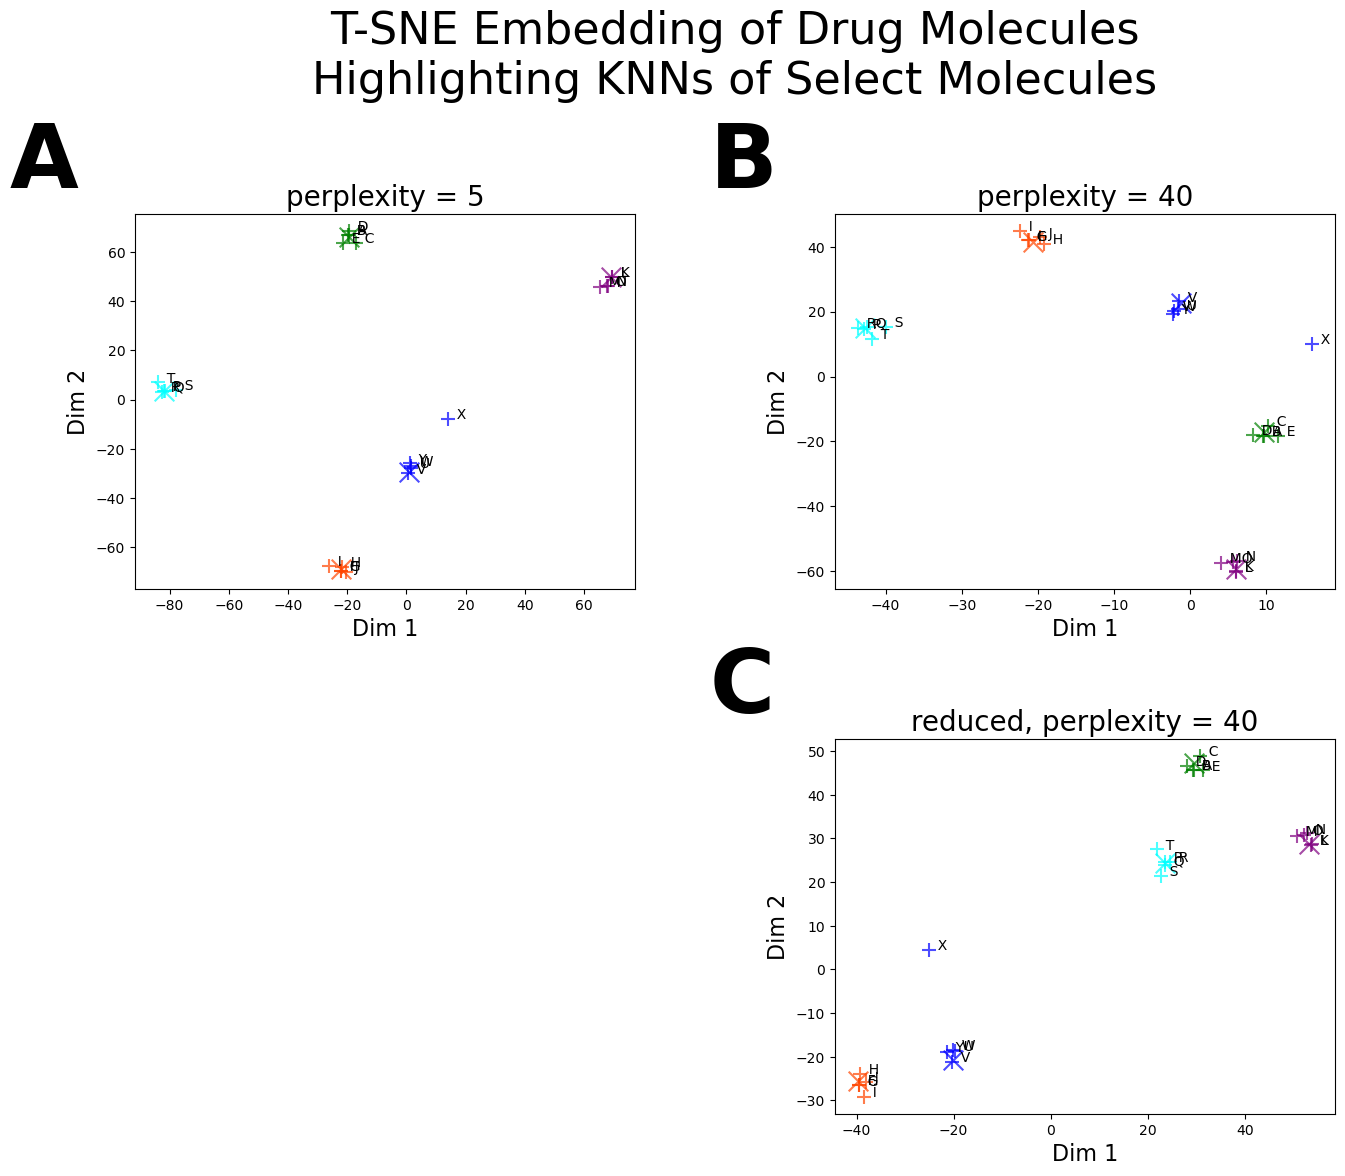

In [6]:
# Plotting
# Full data set


df_knn = separate_query_from_target_mols (df_knn)

df_res = df_emb.copy()
df_red_res = df_red_emb.copy()



fig = plt.figure()

fig, subfigures = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 12))



df_embedded = df_res[df_res['perplexity'] == 5].copy()    
panel_plot_multi_tsne (subfigures[0][0], df_knn, df_embedded, "perplexity = 5")

df_embedded = df_res[df_res['perplexity'] == 40].copy()    
panel_plot_multi_tsne (subfigures[0][1], df_knn, df_embedded, "perplexity = 40")

df_embedded = df_red_res[df_red_res['perplexity'] == 40].copy()    
panel_plot_multi_tsne (subfigures[1][1], df_knn, df_embedded, "reduced, perplexity = 40")



    
subfigures[0][0].text(-0.25, 1.25, "A", transform=subfigures[0][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[0][1].text(-0.25, 1.25, "B", transform=subfigures[0][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][1].text(-0.25, 1.25, "C", transform=subfigures[1][1].transAxes,
            fontsize=64, fontweight='bold', va='top')

subfigures[1][0].axis('off')


fig.suptitle('T-SNE Embedding of Drug Molecules\nHighlighting KNNs of Select Molecules', fontsize = 32, y = 1.02)



plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig (fname_out_drugs_knn_tsne_plot, dpi=300)

plt.show()



#do_analysis (df_drugs, df_knn, perplexity_val)
#do_left_out_analysis (df_drugs, df_knn, perplexity_val)

In [7]:
# References:

# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.jaccard.html#scipy.spatial.distance.jaccard
# Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
# Ref: https://sourceforge.net/p/rdkit/mailman/message/24426410/
# Ref: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/
# Ref: https://stackoverflow.com/questions/57568311/matplotlib-scatter-issue-with-python-3-x
# Ref: https://www.science-emergence.com/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
# Ref: https://www.pluralsight.com/guides/choosing-color-palettes
# Ref: https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf
# Ref: https://htmlcolorcodes.com/color-picker/
# Ref: https://stackoverflow.com/questions/46113732/modulenotfounderror-no-module-named-sklearn
# Ref: https://note.nkmk.me/en/python-numpy-ndarray-ndim-shape-size/


